In [1]:
import re
import operator
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from visualization_methods import VisualizationMethods as vm
from aggregation_methods import AggregationMethods as am
import data_methods as dm

df = dm.get_valid_dataframe()
df = df[df['has_used_by_count']]

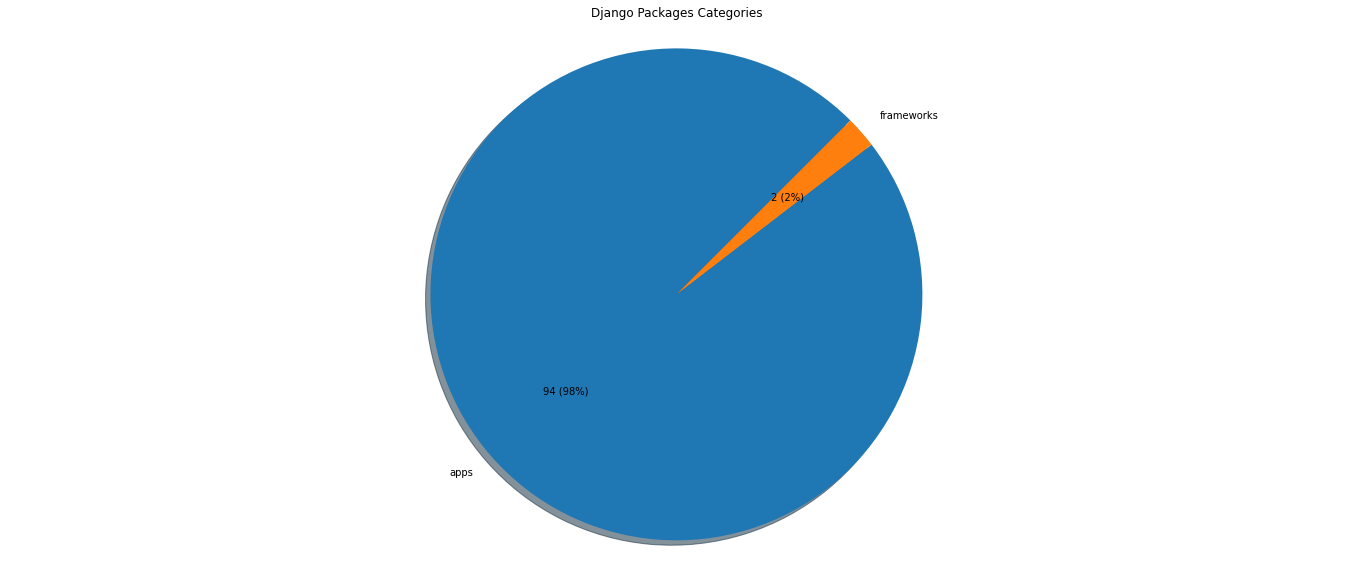

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(24, 10))
fig.set_facecolor('white')

categories = 'apps', 'frameworks'

sizes = [
    len(df[df['dp_category'] == categories[0]]),
    len(df[df['dp_category'] == categories[1]]),    
]

vm.set_pie_by_ax(ax, sizes, categories, 'Django Packages Categories')

plt.show()

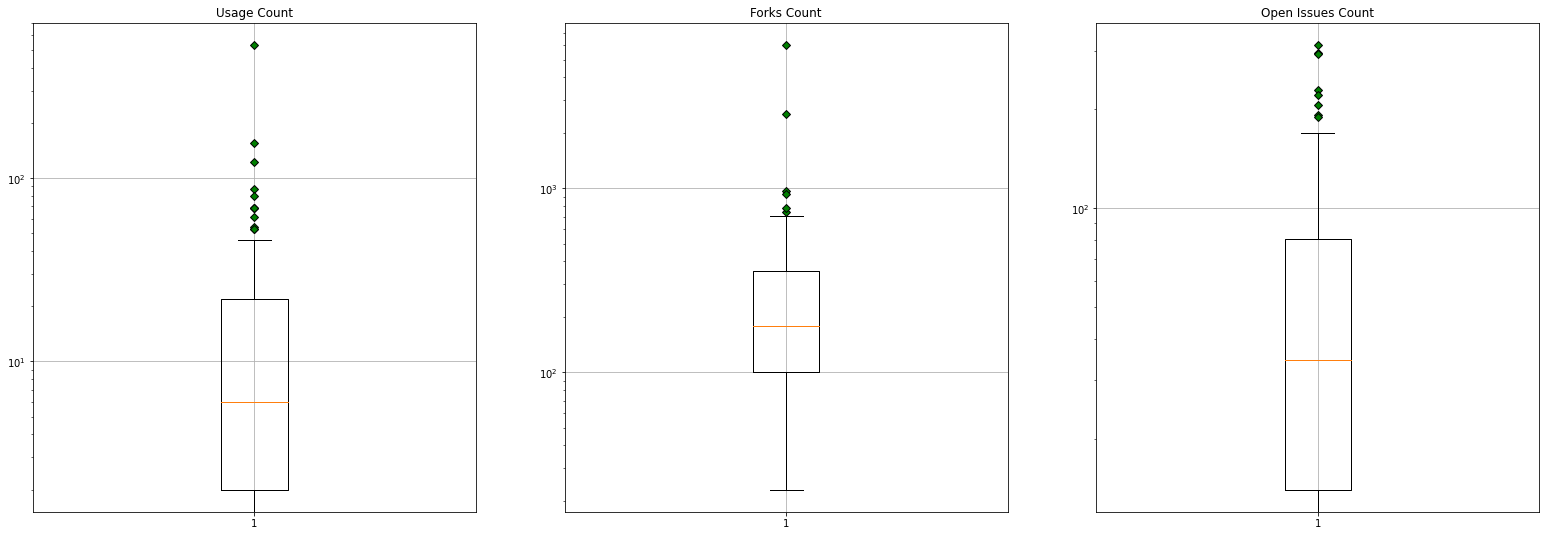

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27, 9))

vm.set_boxplot_by_ax(ax1, df['dp_usage_count'].values, 'Usage Count', True)
vm.set_boxplot_by_ax(ax2, df['repo_forks'].values, 'Forks Count', True)
vm.set_boxplot_by_ax(ax3, df['repo_open_issues'].values, 'Open Issues Count', True)

plt.show()

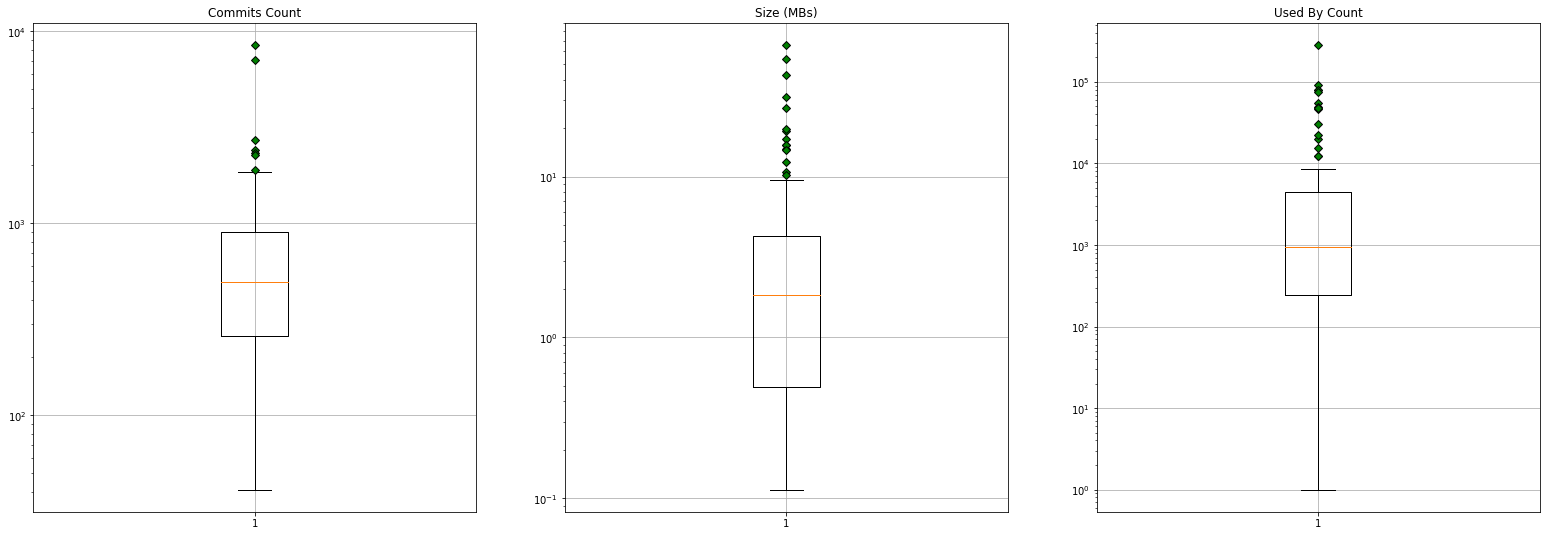

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27, 9))

size_bytes = df['repo_size'].values
size_kbytes = [b/1000 for b in size_bytes]
size_mbytes = [b/1000 for b in size_kbytes]

vm.set_boxplot_by_ax(ax1, df['repo_commits'].values, 'Commits Count', True)
vm.set_boxplot_by_ax(ax2, size_mbytes, 'Size (MBs)', True)
vm.set_boxplot_by_ax(ax3, df['used_by_count'].values, 'Used By Count', True)

plt.show()

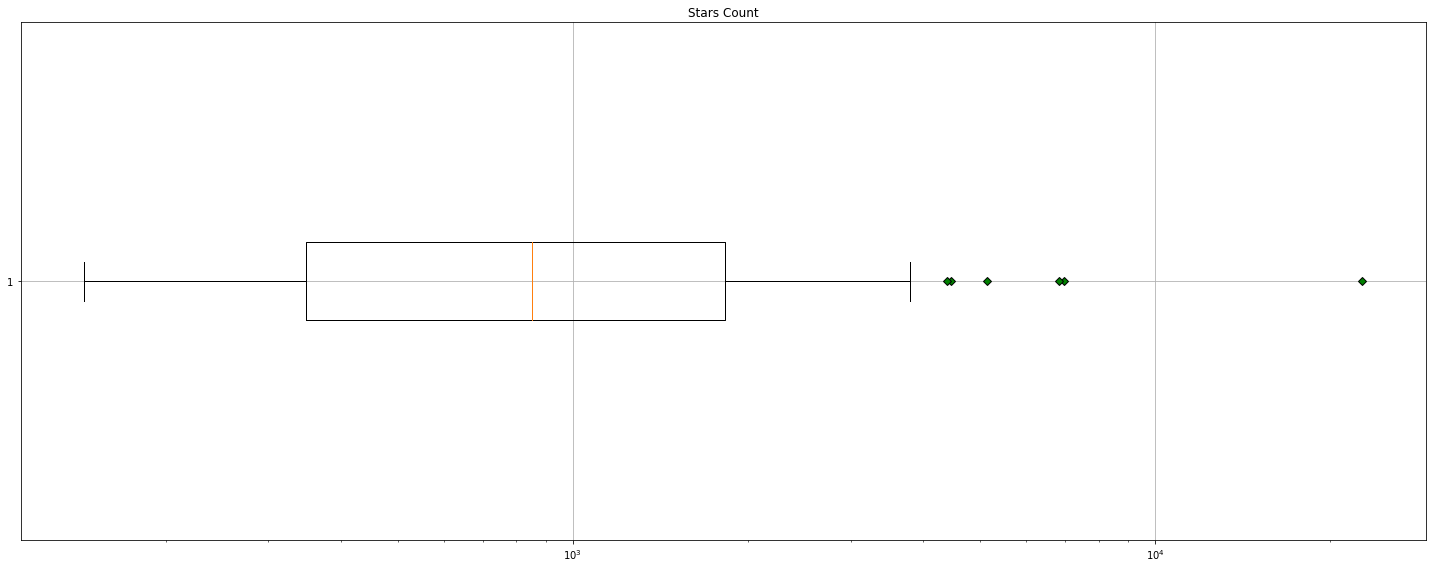

In [5]:
fig, ax = plt.subplots(figsize=(20, 8))

vm.set_boxplot_by_ax(ax, df['repo_stars'].values, 'Stars Count', True, True)

plt.tight_layout()
plt.show()

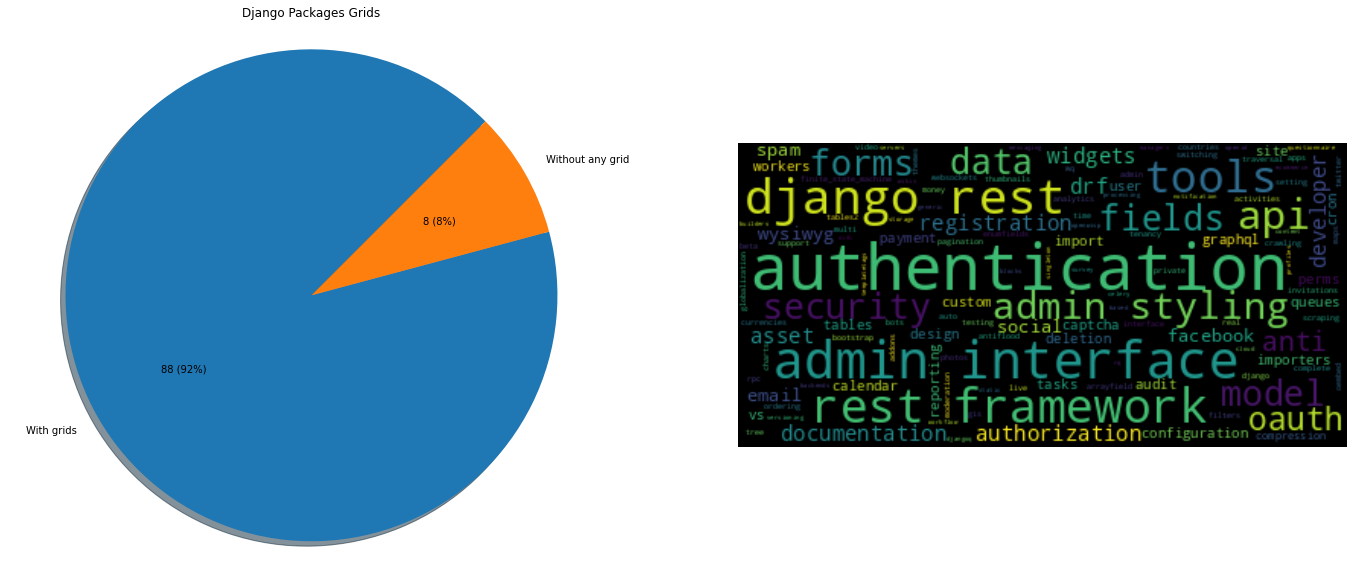

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
fig.set_facecolor('white')

labels = 'With grids', 'Without any grid'

sizes = [
    len(df[~df['dp_grids'].isnull()]),
    len(df[df['dp_grids'].isnull()]),
]

vm.set_pie_by_ax(ax1, sizes, labels, 'Django Packages Grids')

grid_concate, grids_freq, grids_freq_by_used_by = am.get_concate_and_freqs(df, 'dp_grids', 'used_by_count')

ax2.imshow(WordCloud().generate(grid_concate), interpolation='bilinear')
ax2.axis("off")

plt.show()

/home/rafaatsouza/Projects/django-packages-miner/visualization/visualization_methods.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys, rotation=45, ha='right')
/home/rafaatsouza/Projects/django-packages-miner/visualization/visualization_methods.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys, rotation=45, ha='right')


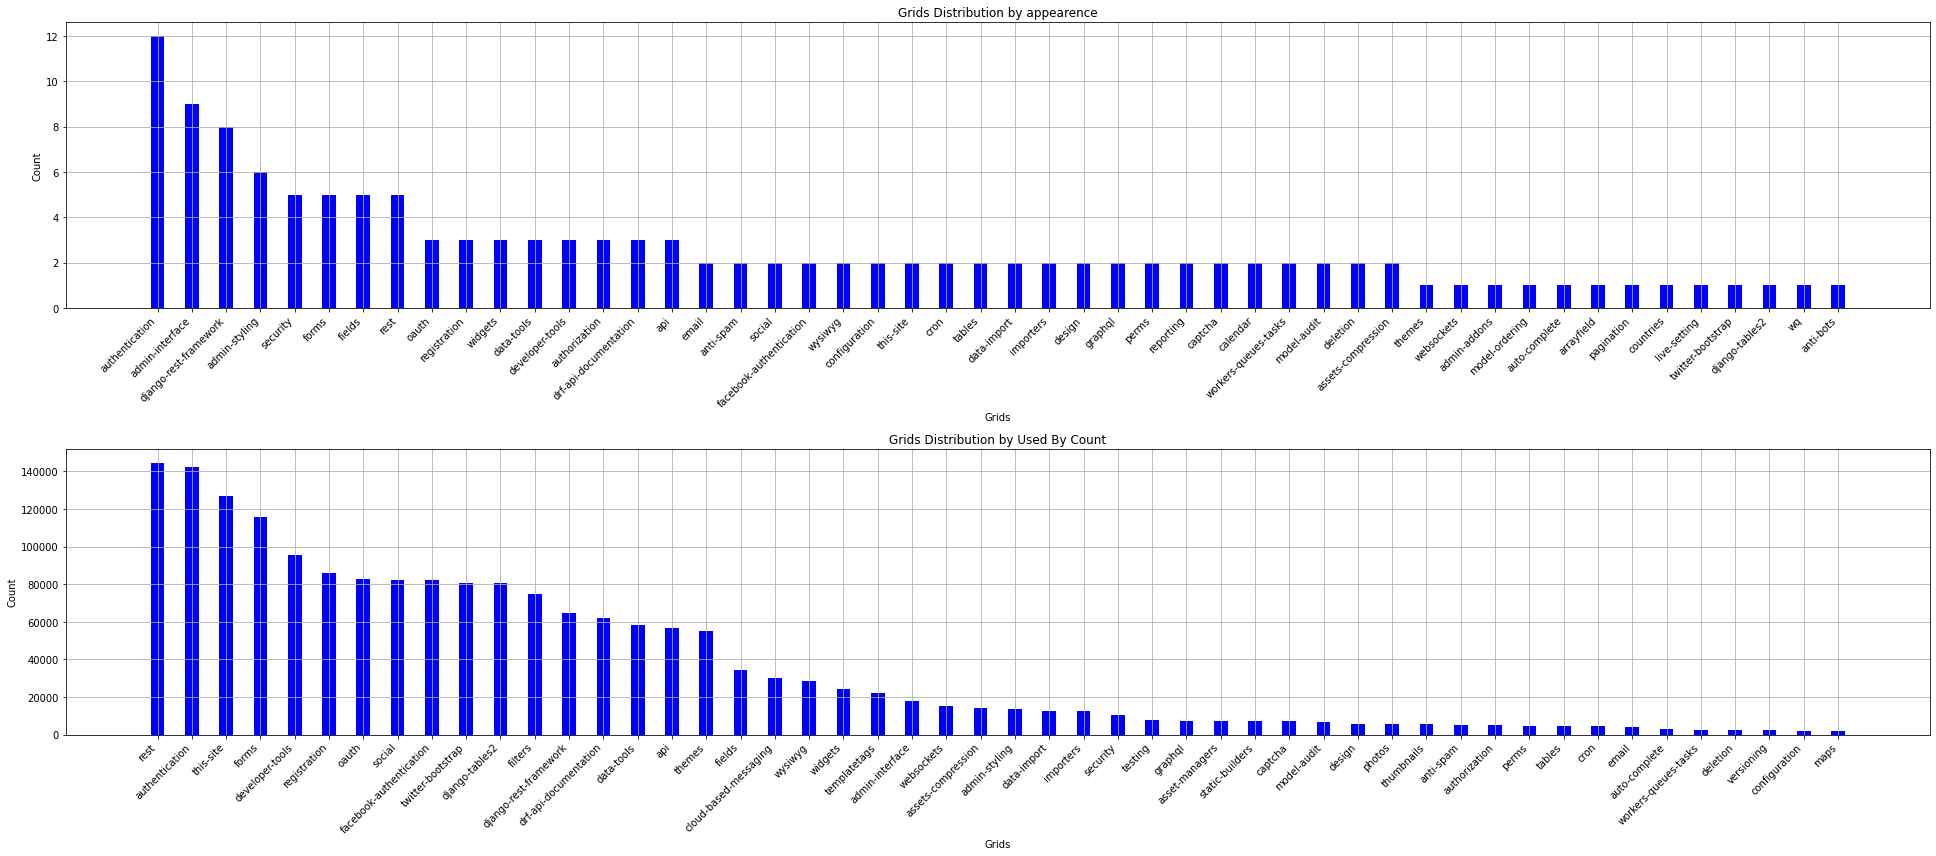

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(27, 12))

top = 50
top_grid_freq = {k[0]: k[1] for k in sorted(grids_freq.items(), key=operator.itemgetter(1), reverse=True)[:top]}
top_grid_freq_by_used_count = {k[0]: k[1] for k in sorted(grids_freq_by_used_by.items(), key=operator.itemgetter(1), reverse=True)[:top]}

vm.show_bar_chart_by_dict_and_ax(ax1, top_grid_freq, 'Grids', 'Count', 'Grids Distribution by appearence', 'blue')
vm.show_bar_chart_by_dict_and_ax(ax2, top_grid_freq_by_used_count, 'Grids', 'Count', 'Grids Distribution by Used By Count', 'blue')

plt.tight_layout()
plt.show()

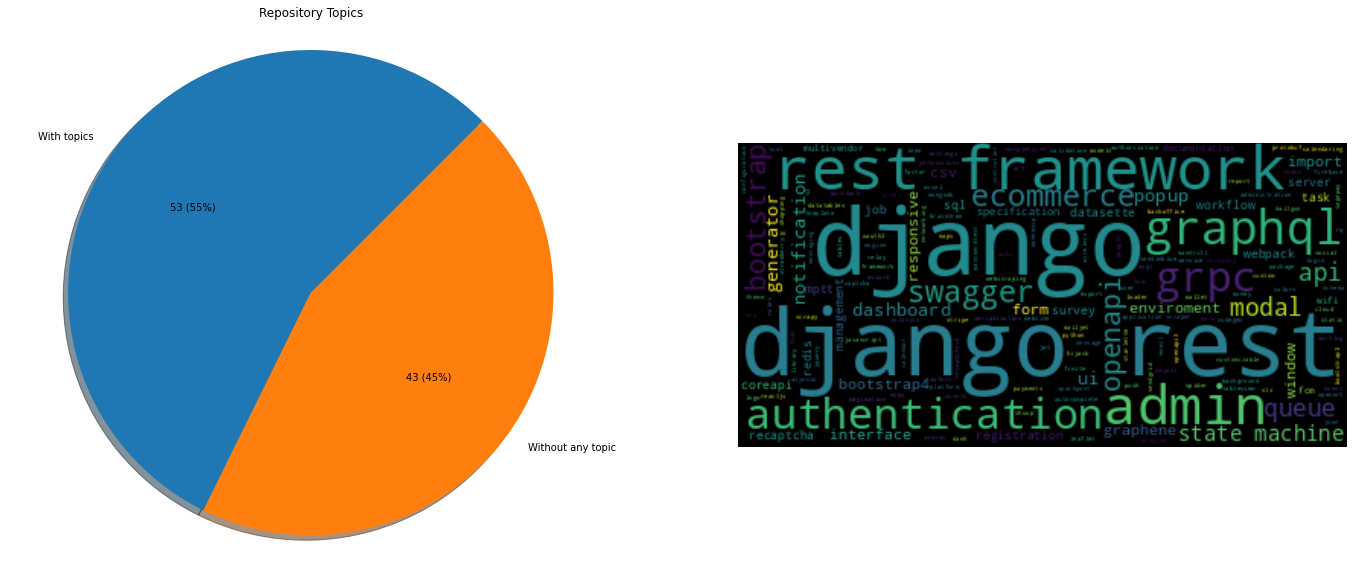

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
fig.set_facecolor('white')

labels = 'With topics', 'Without any topic'

sizes = [
    len(df[~df['repo_topics'].isnull()]),
    len(df[df['repo_topics'].isnull()]),
]

vm.set_pie_by_ax(ax1, sizes, labels, 'Repository Topics')

unwanted_topics = [ 'django' ]
unwanted_regex = [ 
    re.compile(r'^(python)((\d+)|(\-.*)|\Z)', re.IGNORECASE), 
    re.compile(r'^(hacktoberfest)((\-\d+)|(\d+)|\Z)', re.IGNORECASE)
]

topics_concate, topics_freq, topics_freq_by_used_by = (
    am.get_concate_and_freqs(df, 'repo_topics', 'used_by_count', unwanted_topics, unwanted_regex)
)

ax2.imshow(WordCloud().generate(topics_concate), interpolation='bilinear')
ax2.axis("off")

plt.show()

/home/rafaatsouza/Projects/django-packages-miner/visualization/visualization_methods.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys, rotation=45, ha='right')
/home/rafaatsouza/Projects/django-packages-miner/visualization/visualization_methods.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys, rotation=45, ha='right')


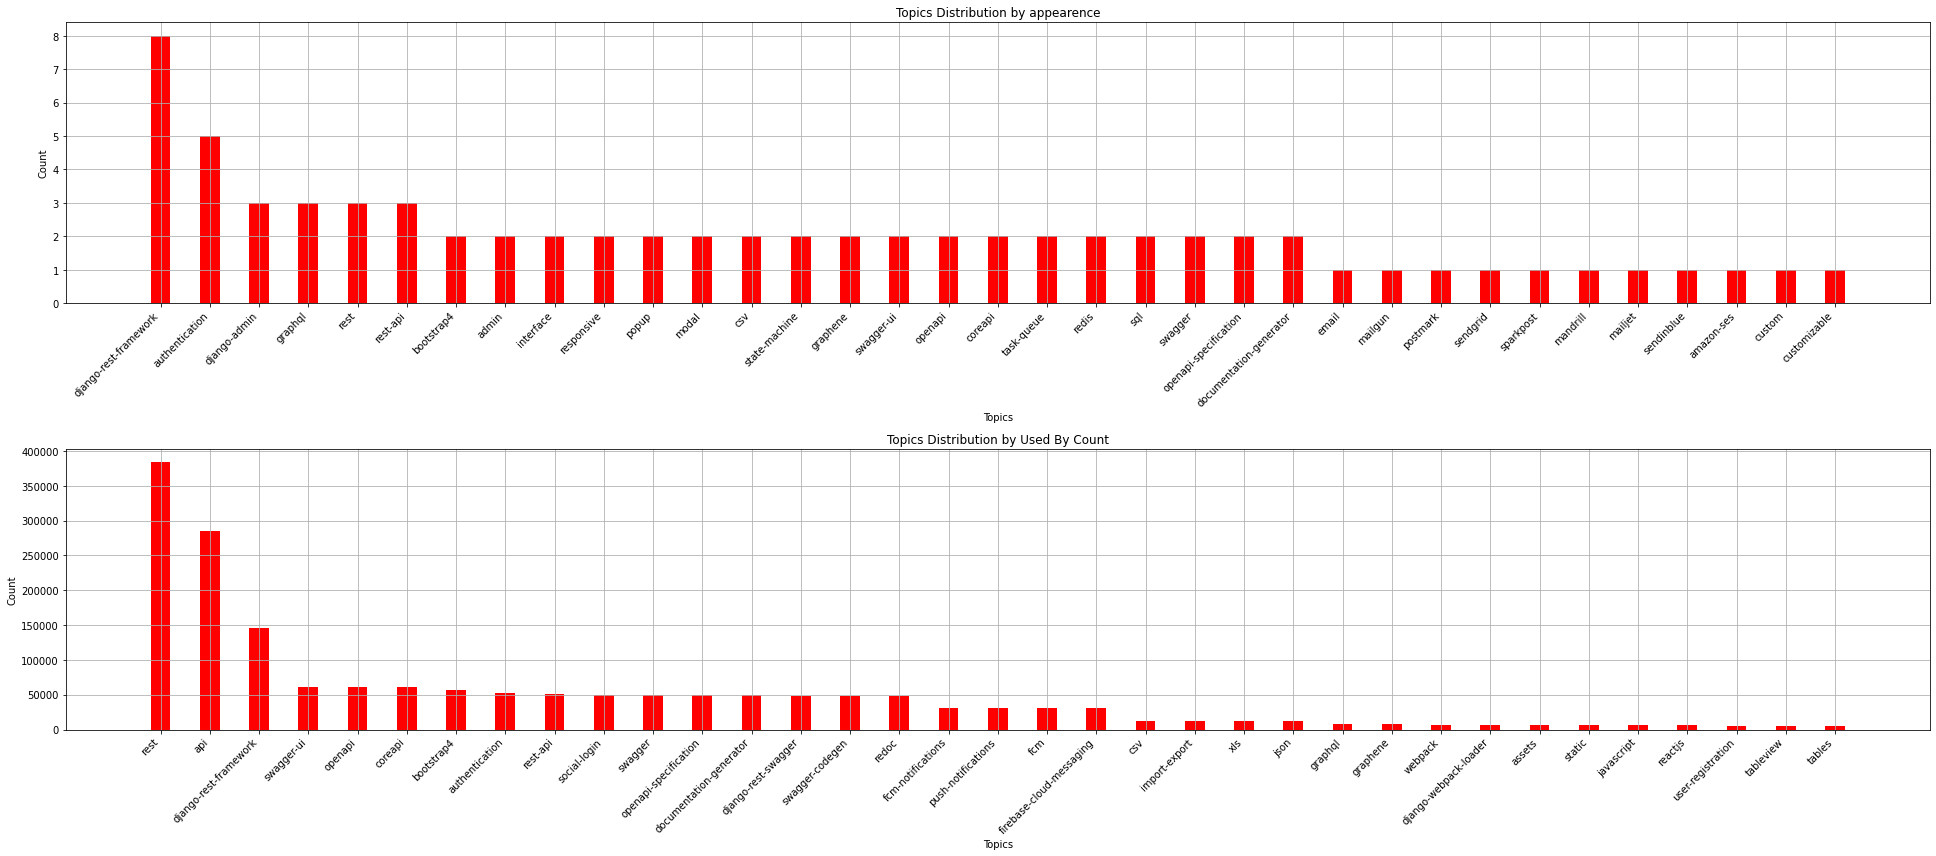

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(27, 12))

top = 35
top_topic_freq = {k[0]: k[1] for k in sorted(topics_freq.items(), key=operator.itemgetter(1), reverse=True)[:top]}
top_topic_freq_by_used_count = {k[0]: k[1] for k in sorted(topics_freq_by_used_by.items(), key=operator.itemgetter(1), reverse=True)[:top]}

vm.show_bar_chart_by_dict_and_ax(ax1, top_topic_freq, 'Topics', 'Count', 'Topics Distribution by appearence', 'red')
vm.show_bar_chart_by_dict_and_ax(ax2, top_topic_freq_by_used_count, 'Topics', 'Count', 'Topics Distribution by Used By Count', 'red')

plt.tight_layout()
plt.show()